In [1]:
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import poisson
from scipy.stats import nbinom
from scipy.stats import norm
import pandas as pd
import sympy as sp
from sympy import *
sp.init_printing()
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import numpy as np
from scipy.misc import derivative
import math
from math import *
from fractions import Fraction
from sympy import Rational as R
from IPython.display import display, Math, Latex
%matplotlib inline
from IPython.display import Image, HTML

In [9]:
Index = [5, 6, 7, 8]
Columns = {1: [R(1,12), R(2,12), R(2,12), 0], 2: [0, 0, R(1,12), R(2,12)], 3: [0, R(2,12), R(2,12), 0]}
df = pd.DataFrame(data=Columns, index = Index)

fx = df.sum(0)
fy = df.sum(1)

EX = np.array(df.columns).dot(fx)
EY = np.array(df.index).dot(fy)

EX2 = (np.array(df.columns)**2).dot(fx)
EY2 = (np.array(df.index)**2).dot(fy)

VY = EX2 - EX**2
VX = EY2 - EY**2
EYX = np.array(df.index).dot(np.array(df)).dot(np.array(df.columns))

In [10]:
fx

1    5/12
2     1/4
3     1/3
dtype: object

In [78]:
df

,1,2,3
5,1/12,0,0
6,1/6,0,1/6
7,1/6,1/12,1/6
8,0,1/6,0


In [52]:
# a)
fx

1    5/12
2     1/4
3     1/3
dtype: object

In [11]:
fy

5    0.083333
6    0.333333
7    0.416667
8    0.166667
dtype: float64

In [12]:
# convert DataFrame to a list of lists of Sympy Rational objects
data = [[Rational(x) for x in row] for row in df.values]

sums = [sum(row) for row in data]

fy = pd.DataFrame(data = sums, index = Index)
fy

,0
5,1/12
6,1/3
7,5/12
8,1/6


In [66]:
# b)
print("EX: {} , {}".format(EX, round(float(EX), 2)))
print("EY: {}".format(round(float(EY), 2)))
print("EXY: {}".format(round(float(EXY), 2)))

EX: 23/12 , 1.92
EY: 6.67
EXY: 12.92


In [ ]:
# c)

In [80]:
# d
(1/6) / (1/3), 0 / (1/3), (1/6) / (1/3)

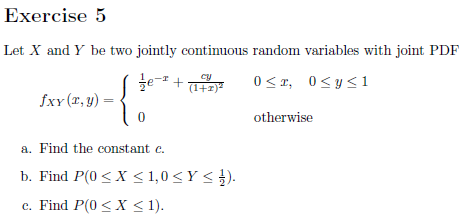

### Manual solutions are also uploaded.

In [7]:
# 5.5a
x, y, z, c = symbols('x y z c')

f = R(1,2)*E**(-x)+(c*y)/((1+x)**2)
list = solve(sp.integrate(f,(x, 0, oo), (y, 0, 1)) -1, c)

display(Math(r'c = '+ latex(list[0])))

<IPython.core.display.Math object>

In [2]:
E

In [5]:
# 5.5b
f = R(1,2)*E**(-x) + y/(1+x)**2
sp.integrate(f,(x, 0, 1), (y, 0, R(1,2))) 

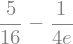

In [40]:
sp.integrate(f,(y, 0, R(1,2)), (x, 0, 1)) # Note the difference of doing dydx vs dxdy

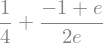

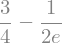

In [20]:
# 5.5c
display(sp.integrate(f,(x, 0, 1), (y, 0, 1)))
display(sp.integrate(f,(y, 0, 1), (x, 0, 1)))
# Note the difference of doing dydx vs dxdy

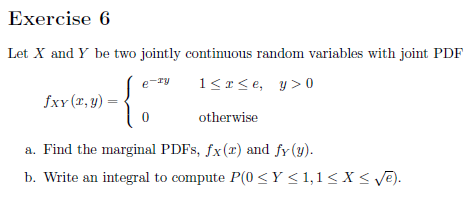

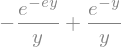

In [25]:
#6.6a
fxy = E**(-x*y)
fx = sp.integrate(fxy, (y, 0, oo), conds = "none")
fy = sp.integrate(fxy, (x, 1, E), conds = "none")
display(fx, fy)

In [26]:
sp.integrate(fxy, (y, 0, 1), (x, 1, math.sqrt(E)))

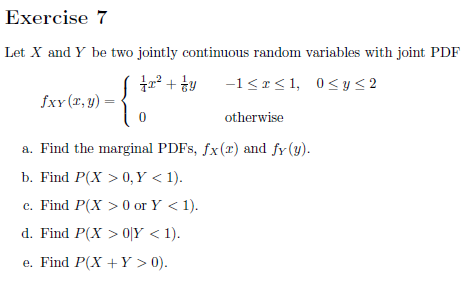

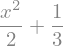

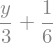

In [41]:
# 5.7a

fxy = R(1,4)*x**2 + R(1,6)*y
fx = sp.integrate(fxy, (y, 0, 2))
fy = sp.integrate(fxy, (x, -1, 1))
display(fx, fy)

In [29]:
# 5.7b

sp.integrate(fxy, (y, 0, 1), (x, 0, 1))

In [30]:
# 5.7c
1-sp.integrate(fxy, (y, 1, 2), (x, -1, 0)) # method 1

In [42]:
sp.integrate(fxy, (x, 0, 1), (y, 0, 2)) + \
sp.integrate(fxy, (x, -1, 1), (y, 0, 1)) - \
sp.integrate(fxy, (x, 0, 1), (y, 0, 1))

In [38]:
# 5.7.d
display(
1 / (6 * sp.integrate(fxy, (x, -1, 1), (y, 0, 1))),
1 / (6 * sp.integrate(fy, (y, 0, 1))))

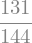

In [39]:
# 5.7e

1 - sp.integrate(fxy, (y, 0, -x), (x, -1, 0))

In [2]:
def EX(f, x, i, j):
    return sp.integrate(x*f, (x, i, j))


In [8]:
x = symbols('x')
f = 1/4*x*E**(-x/2)

In [9]:
t = symbols('t')
EX(f, x, 0, oo)

In [ ]:
sp.integrate(x*f)